# Fraud Detection using Self Organizing Maps (SOM)

This is the an Unsupervised Deep Learning Models. The business challenge here is about detecting fraud in credit card applications. A Deep Learning model will be implemented for a bank based on the given dataset that contains information on customers applying for an advanced credit card. 

This is the data that customers provided when filling the application form. The task is hese is to detect potential fraud within these applications. That means that by the end of this challenge, it will come up with explicit list of customers who potentially cheated on their applications.

In [1]:
# Importing the packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Part 1 - Data Preprocessing

In [2]:
# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

## Training the SOM

In [3]:
# Here minisom is open source implementation python file of SOM algo.
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

## Visualizing the result

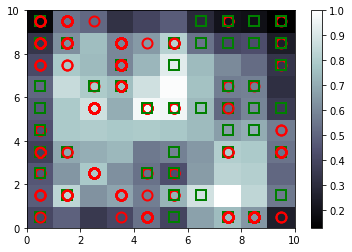

In [4]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds

In [8]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(5,5)], mappings[(6,5)]), axis = 0)
frauds = sc.inverse_transform(frauds)

### List of Customer ids

In [10]:
print(frauds[:,0])

[15766183. 15808662. 15684722. 15772329. 15734649. 15717629. 15757188.
 15635598. 15647191. 15776545. 15792107. 15623369. 15793896. 15650591.
 15813192. 15675450. 15790254. 15801441. 15788131. 15764841. 15748649.]
